# Unsupervised Analysis of Days of Week
Treating crossings each day as features to learn about relationships between various days.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

## Get Data

In [2]:
from jupyterworkflow.data import get_fremont_data

In [3]:
data = get_fremont_data()

In [4]:
data.head()

,West,East,Total
Date,,,
2019-01-31 23:00:00,7.0,6.0,13.0
2019-01-31 22:00:00,13.0,16.0,29.0
2019-01-31 21:00:00,18.0,27.0,45.0
2019-01-31 20:00:00,32.0,33.0,65.0
2019-01-31 19:00:00,40.0,94.0,134.0


## Data Analysis

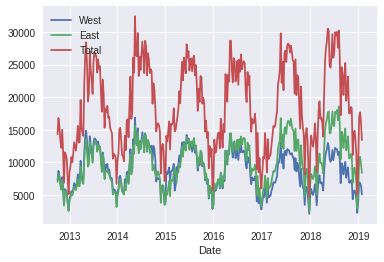

In [5]:
data.resample('W').sum().plot()

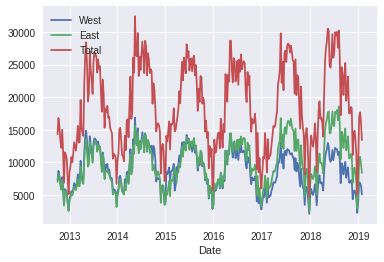

In [6]:
data.resample('W').sum().plot()

(0, 1098983.95)

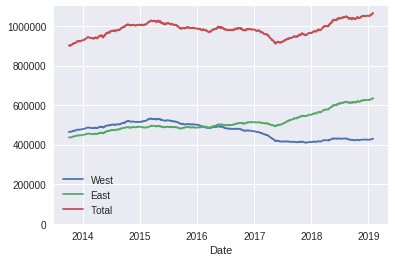

In [7]:
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None)

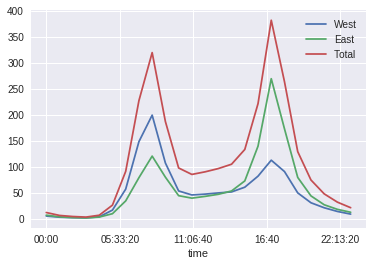

In [8]:
data.groupby(data.index.time).mean().plot()

In [9]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


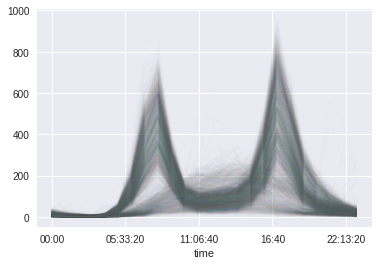

In [10]:
pivoted.plot(legend=False, alpha=0.01)

## Principal Component Analysis

In [11]:
X = pivoted.fillna(0).T.values
X.shape

(2312, 24)

In [12]:
X2 = PCA(2).fit_transform(X)

In [13]:
X2.shape

(2312, 2)

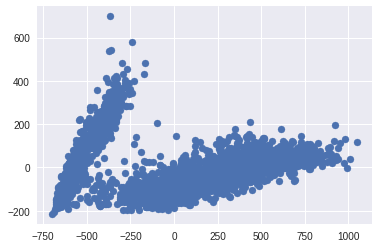

In [14]:
plt.scatter(X2[:, 0],X2[:, 1])

In [15]:
gmm = GaussianMixture(2)
gmm.fit(X)
labels = gmm.predict(X)
labels

array([1, 1, 1, ..., 1, 1, 1])

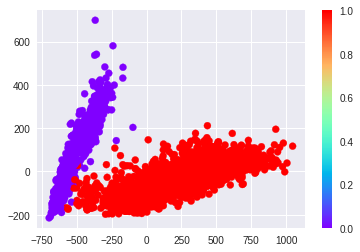

In [16]:
plt.scatter(X2[:, 0],X2[:, 1], c=labels, cmap='rainbow')
plt.colorbar()

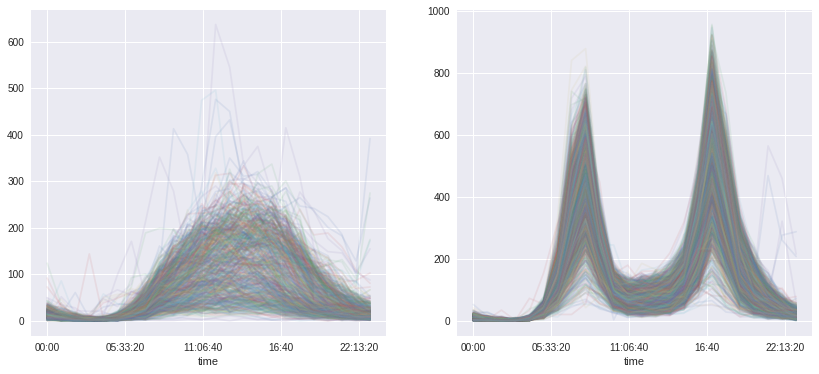

In [17]:
fig, ax = plt.subplots(1, 2, figsize=[14, 6])
pivoted.T[labels == 0].T.plot(legend=False, alpha=0.1, ax = ax[0])
pivoted.T[labels == 1].T.plot(legend=False, alpha=0.1, ax = ax[1])

In [18]:
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek

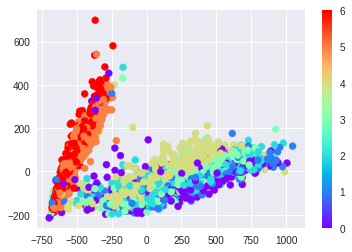

In [19]:
plt.scatter(X2[:, 0],X2[:, 1], c=dayofweek, cmap='rainbow')
plt.colorbar()

In [20]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 1) & (dayofweek < 5)]

DatetimeIndex(['2012-10-03', '2012-10-04', '2012-10-05', '2012-10-08',
               '2012-10-09', '2012-10-10', '2012-10-11', '2012-10-12',
               '2012-10-15', '2012-10-16',
               ...
               '2019-01-18', '2019-01-21', '2019-01-22', '2019-01-23',
               '2019-01-24', '2019-01-25', '2019-01-28', '2019-01-29',
               '2019-01-30', '2019-01-31'],
              dtype='datetime64[ns]', length=1595, freq=None)